In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
print("success")

success


In [141]:
df = pd.read_csv("data/data.csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


# Data cleanup

In [142]:
def iqr_clean(df, columns):
    for cl in columns:
        q_25 = df[cl].quantile(.25)
        q_75 = df[cl].quantile(.75)
        iqr = q_75 - q_25
        df_clean = df[(df[cl] >= q_25 - iqr * 1.5) & (df[cl] <= q_75 + iqr * 1.5)]
    return df_clean

In [143]:
print(df["age"].describe())
print(df["bmi"].describe())
print(df["avg_glucose_level"].describe())

count    5110.000000
mean       43.226614
std        22.612647
min         0.080000
25%        25.000000
50%        45.000000
75%        61.000000
max        82.000000
Name: age, dtype: float64
count    4909.000000
mean       28.893237
std         7.854067
min        10.300000
25%        23.500000
50%        28.100000
75%        33.100000
max        97.600000
Name: bmi, dtype: float64
count    5110.000000
mean      106.147677
std        45.283560
min        55.120000
25%        77.245000
50%        91.885000
75%       114.090000
max       271.740000
Name: avg_glucose_level, dtype: float64


In [144]:
df = df.dropna()
df = df[df["gender"] != "Other"]
columns = ["age", "bmi", "avg_glucose_level"]
df = iqr_clean(df, columns)
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1
10,12109,Female,81.0,1,0,Yes,Private,Rural,80.43,29.7,never smoked,1


In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4339 entries, 2 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4339 non-null   int64  
 1   gender             4339 non-null   object 
 2   age                4339 non-null   float64
 3   hypertension       4339 non-null   int64  
 4   heart_disease      4339 non-null   int64  
 5   ever_married       4339 non-null   object 
 6   work_type          4339 non-null   object 
 7   Residence_type     4339 non-null   object 
 8   avg_glucose_level  4339 non-null   float64
 9   bmi                4339 non-null   float64
 10  smoking_status     4339 non-null   object 
 11  stroke             4339 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 440.7+ KB


# Descriptive statistics + plots

count    4339.000000
mean       40.617073
std        22.301481
min         0.080000
25%        23.000000
50%        41.000000
75%        57.000000
max        82.000000
Name: age, dtype: float64


<Axes: >

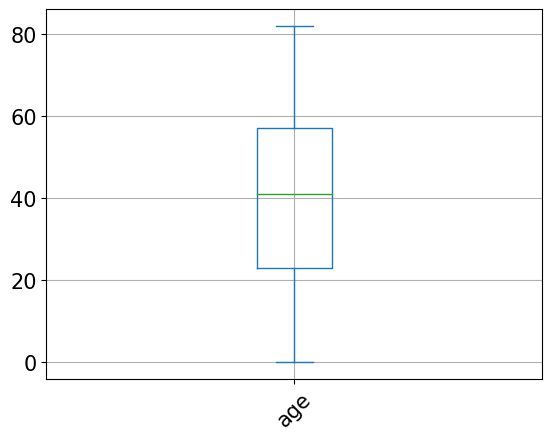

In [146]:
print(df["age"].describe())
df.plot.box(column=['age'], grid=True, rot=45, fontsize=15) 

count    4339.000000
mean       28.311086
std         7.651916
min        10.300000
25%        23.100000
50%        27.600000
75%        32.400000
max        97.600000
Name: bmi, dtype: float64


<Axes: >

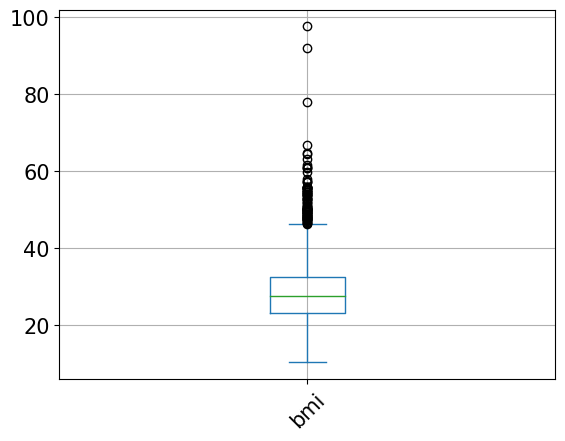

In [147]:
print(df["bmi"].describe())
df.plot.box(column=['bmi'], grid=True, rot=45, fontsize=15) 

Text(0, 0.5, 'frequency')

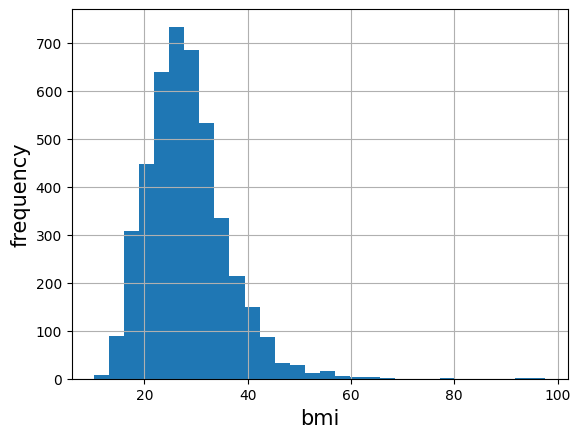

In [148]:
df["bmi"].hist(bins=30)
plt.xlabel("bmi", fontsize=15)
plt.ylabel("frequency", fontsize=15)

count       4339
unique         2
top       Female
freq        2595
Name: gender, dtype: object


<Axes: ylabel='count'>

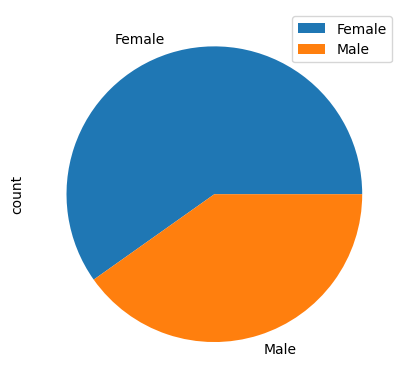

In [149]:
print(df["gender"].describe())
dff = df.groupby(by=["gender"]).count()
dff["count"] = dff["id"]
dff.plot(kind='pie', y='count')

count             4339
unique               4
top       never smoked
freq              1604
Name: smoking_status, dtype: object
['never smoked' 'Unknown' 'smokes' 'formerly smoked']


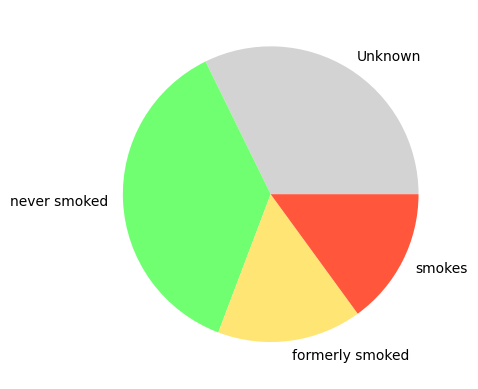

In [150]:
print(df["smoking_status"].describe())
dff = df.groupby(by=["smoking_status"]).count()
dff["count"] = dff["id"]
print(df["smoking_status"].unique())
dff["idx"] = [0,2,1,3]
dff = dff.sort_values(by=['idx'])
plot = dff.plot(kind='pie', y='count', colors=["#D3D3D3", "#70FF70", "#FFE674", "#FF563C"], ylabel="", legend=False)

# Detailed overview

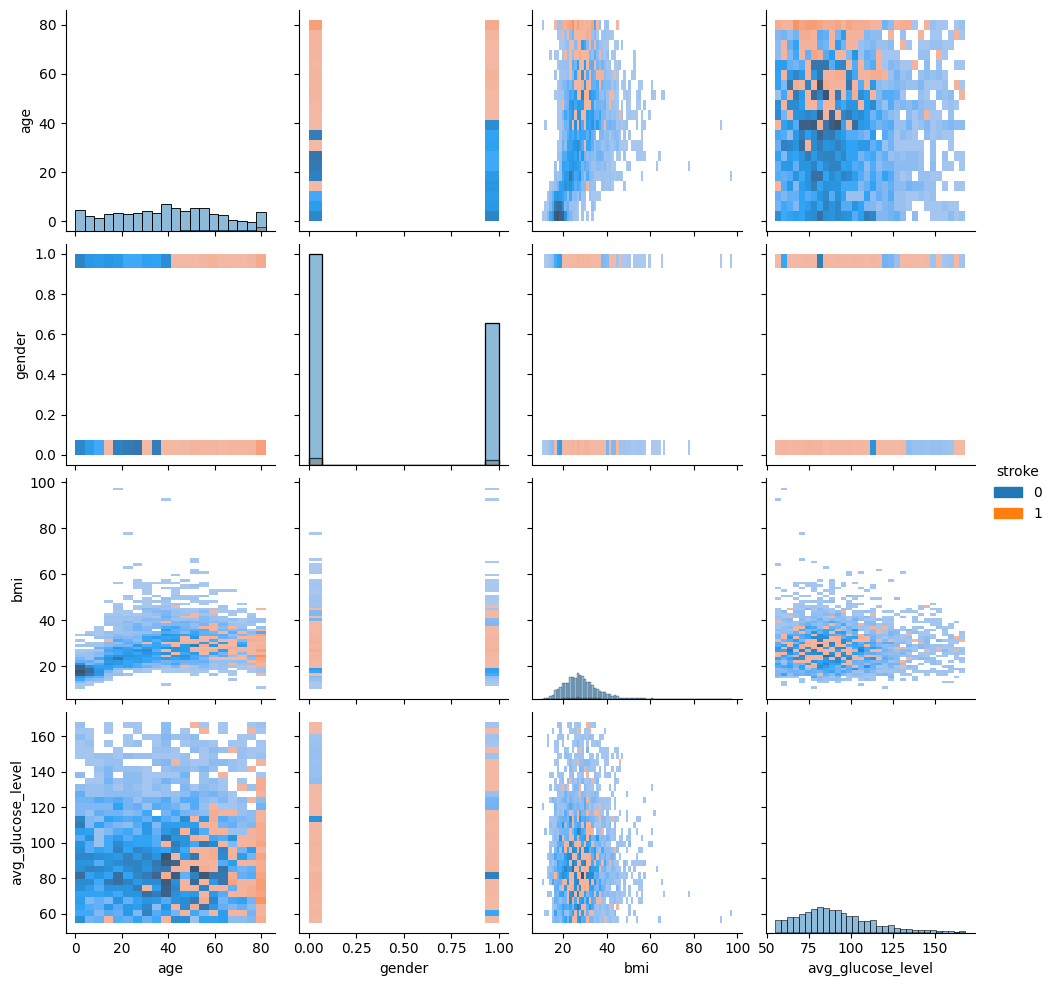

In [154]:
df_new = df
drop = ["id"]
df_new = df_new.drop(drop, axis=1)
df_new = df_new.replace({"Male": 1, "Female": 0})

sns.pairplot(df_new[["age", "gender", "bmi", "stroke", "avg_glucose_level"]], hue="stroke", kind="hist")

<Axes: >

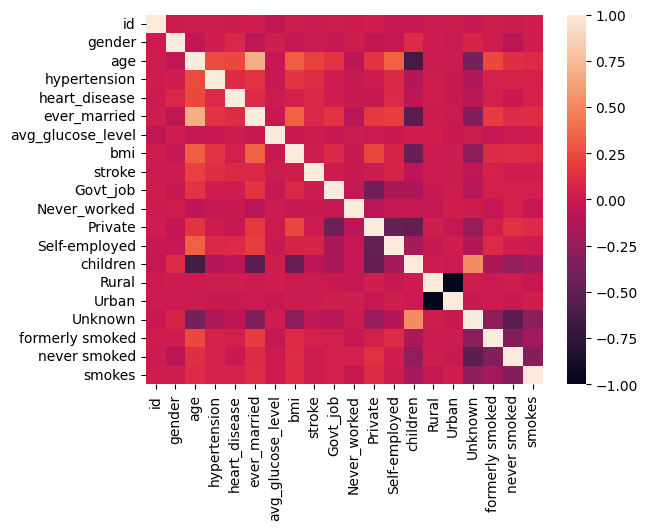

In [136]:
df_new = df
df_new = df_new.replace({"Male": 1, "Female": 0, "Yes": 1, "No":0})
df_new = df_one_hot(df_new, ["work_type", "Residence_type", "smoking_status"])

sns.heatmap(df_new.corr())

# Hypothesis

Rural area has positive impact on heath

<Axes: xlabel='bmi', ylabel='Count'>

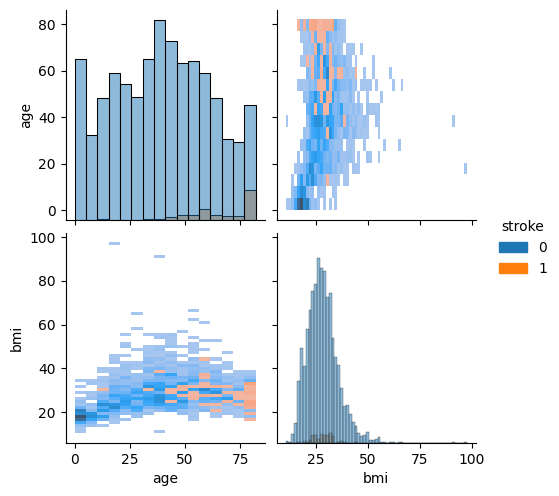

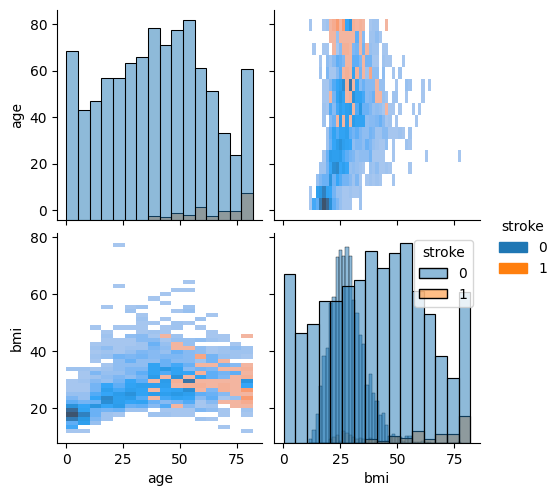

In [165]:
df_rural = df[df["Residence_type"] == "Rural"]
drop = ["id"]
df_rural = df_rural.drop(drop, axis=1)
df_rural = df_rural.replace({"Male": 1, "Female": 0})

df_uraban = df[df["Residence_type"] == "Urban"]
drop = ["id"]
df_uraban = df_uraban.drop(drop, axis=1)
df_uraban = df_uraban.replace({"Male": 1, "Female": 0})

sns.pairplot(df_rural[["age", "bmi", "stroke"]], hue="stroke", kind="hist")
sns.pairplot(df_uraban[["age", "bmi", "stroke"]], hue="stroke", kind="hist")

sns.histplot(data=df_uraban[["age", "bmi", "stroke"]], x="age",hue="stroke")

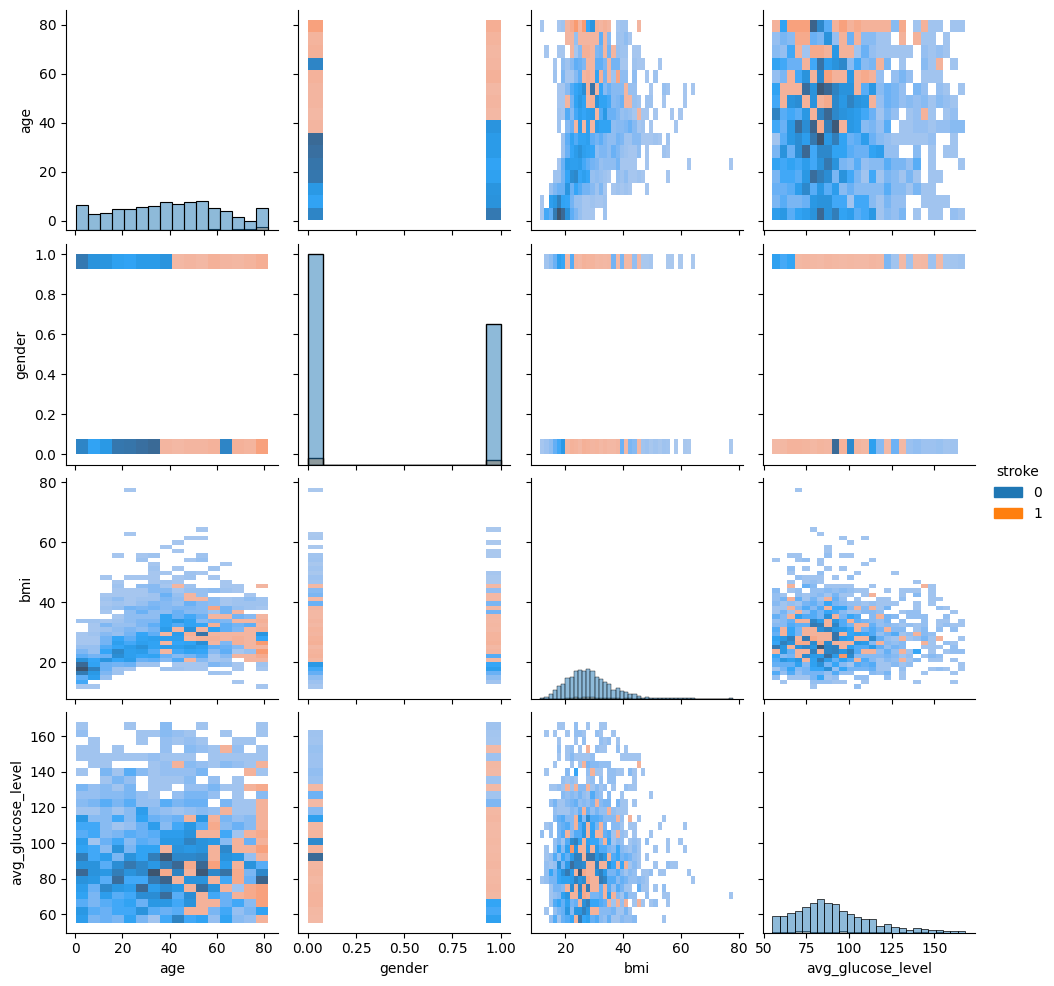

In [158]:
df_uraban = df[df["Residence_type"] == "Urban"]
drop = ["id"]
df_uraban = df_uraban.drop(drop, axis=1)
df_uraban = df_uraban.replace({"Male": 1, "Female": 0})

sns.pairplot(df_uraban[["age", "gender", "bmi", "stroke", "avg_glucose_level"]], hue="stroke", kind="hist")